<a href="https://colab.research.google.com/github/mdhruv2415/Simpsons-Face_identification/blob/main/simpsonsFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv


In [2]:
from google import colab
from  google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 56.9 MB/s eta 0:00:00


In [4]:
import os
import caer
import canaro
import gc #for garbage collection

In [7]:
img_size = (80,80)
channels = 1 #grayscaling
char_path = "/content/drive/MyDrive/ML/SimpsonsDataset/simpsons_dataset"



In [8]:
#bringing the top 10 characters which have most no. of images
if not os.path.isdir(char_path):
    raise ValueError("char_path is not a directory.")

# Check if the user has permission to access the directory
if not os.access(char_path, os.R_OK):
    raise ValueError("User does not have permission to access char_path.")

# Bring the top 10 characters which have the most number of images
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))

# Sort the dictionary in descending order
char_dict = caer.sort_dict(char_dict, descending=True)

print(char_dict)

[('marge_simpson', 665), ('krusty_the_clown', 614), ('charles_montgomery_burns', 547), ('kent_brockman', 498), ('comic_book_guy', 469), ('chief_wiggum', 454), ('bart_simpson', 449), ('edna_krabappel', 400), ('homer_simpson', 397), ('lisa_simpson', 349), ('abraham_grampa_simpson', 313), ('lenny_leonard', 310), ('apu_nahasapeemapetilon', 309), ('milhouse_van_houten', 298), ('mayor_quimby', 246), ('moe_szyslak', 212), ('maggie_simpson', 128), ('groundskeeper_willie', 121), ('barney_gumble', 106), ('carl_carlson', 98), ('martin_prince', 71), ('cletus_spuckler', 47), ('agnes_skinner', 42), ('fat_tony', 27), ('gil', 27), ('miss_hoover', 17), ('disco_stu', 8), ('lionel_hutz', 3)]


In [9]:
#grab names of first 10 elements and store that in a list
characters = []
count = 0
for i in char_dict:
  characters.append(i[0])
  count += 1
  if count >= 10:
    break

characters

['marge_simpson',
 'krusty_the_clown',
 'charles_montgomery_burns',
 'kent_brockman',
 'comic_book_guy',
 'chief_wiggum',
 'bart_simpson',
 'edna_krabappel',
 'homer_simpson',
 'lisa_simpson']

In [10]:
#create traaining data
train = caer.preprocess_from_dir(char_path , characters , channels = channels , IMG_SIZE = img_size  , isShuffle = True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] 665 files found in 0.012926816940307617s
[INFO] 614 files found in 0.009970426559448242s
[INFO] 547 files found in 0.026735782623291016s
[INFO] 498 files found in 0.008191823959350586s
[INFO] 469 files found in 0.00879359245300293s
[INFO] 454 files found in 0.013628244400024414s
[INFO] 449 files found in 0.00725865364074707s
[INFO] 400 files found in 0.009130239486694336s
[INFO] 397 files found in 0.01010584831237793s
[INFO] 349 files found in 0.00621342658996582s
----------------------------------------------
[INFO] 4842 files preprocessed! Took 1m 43s


In [11]:
 #to check no. og images
 len(train)

4842

In [12]:
batch_size = 32

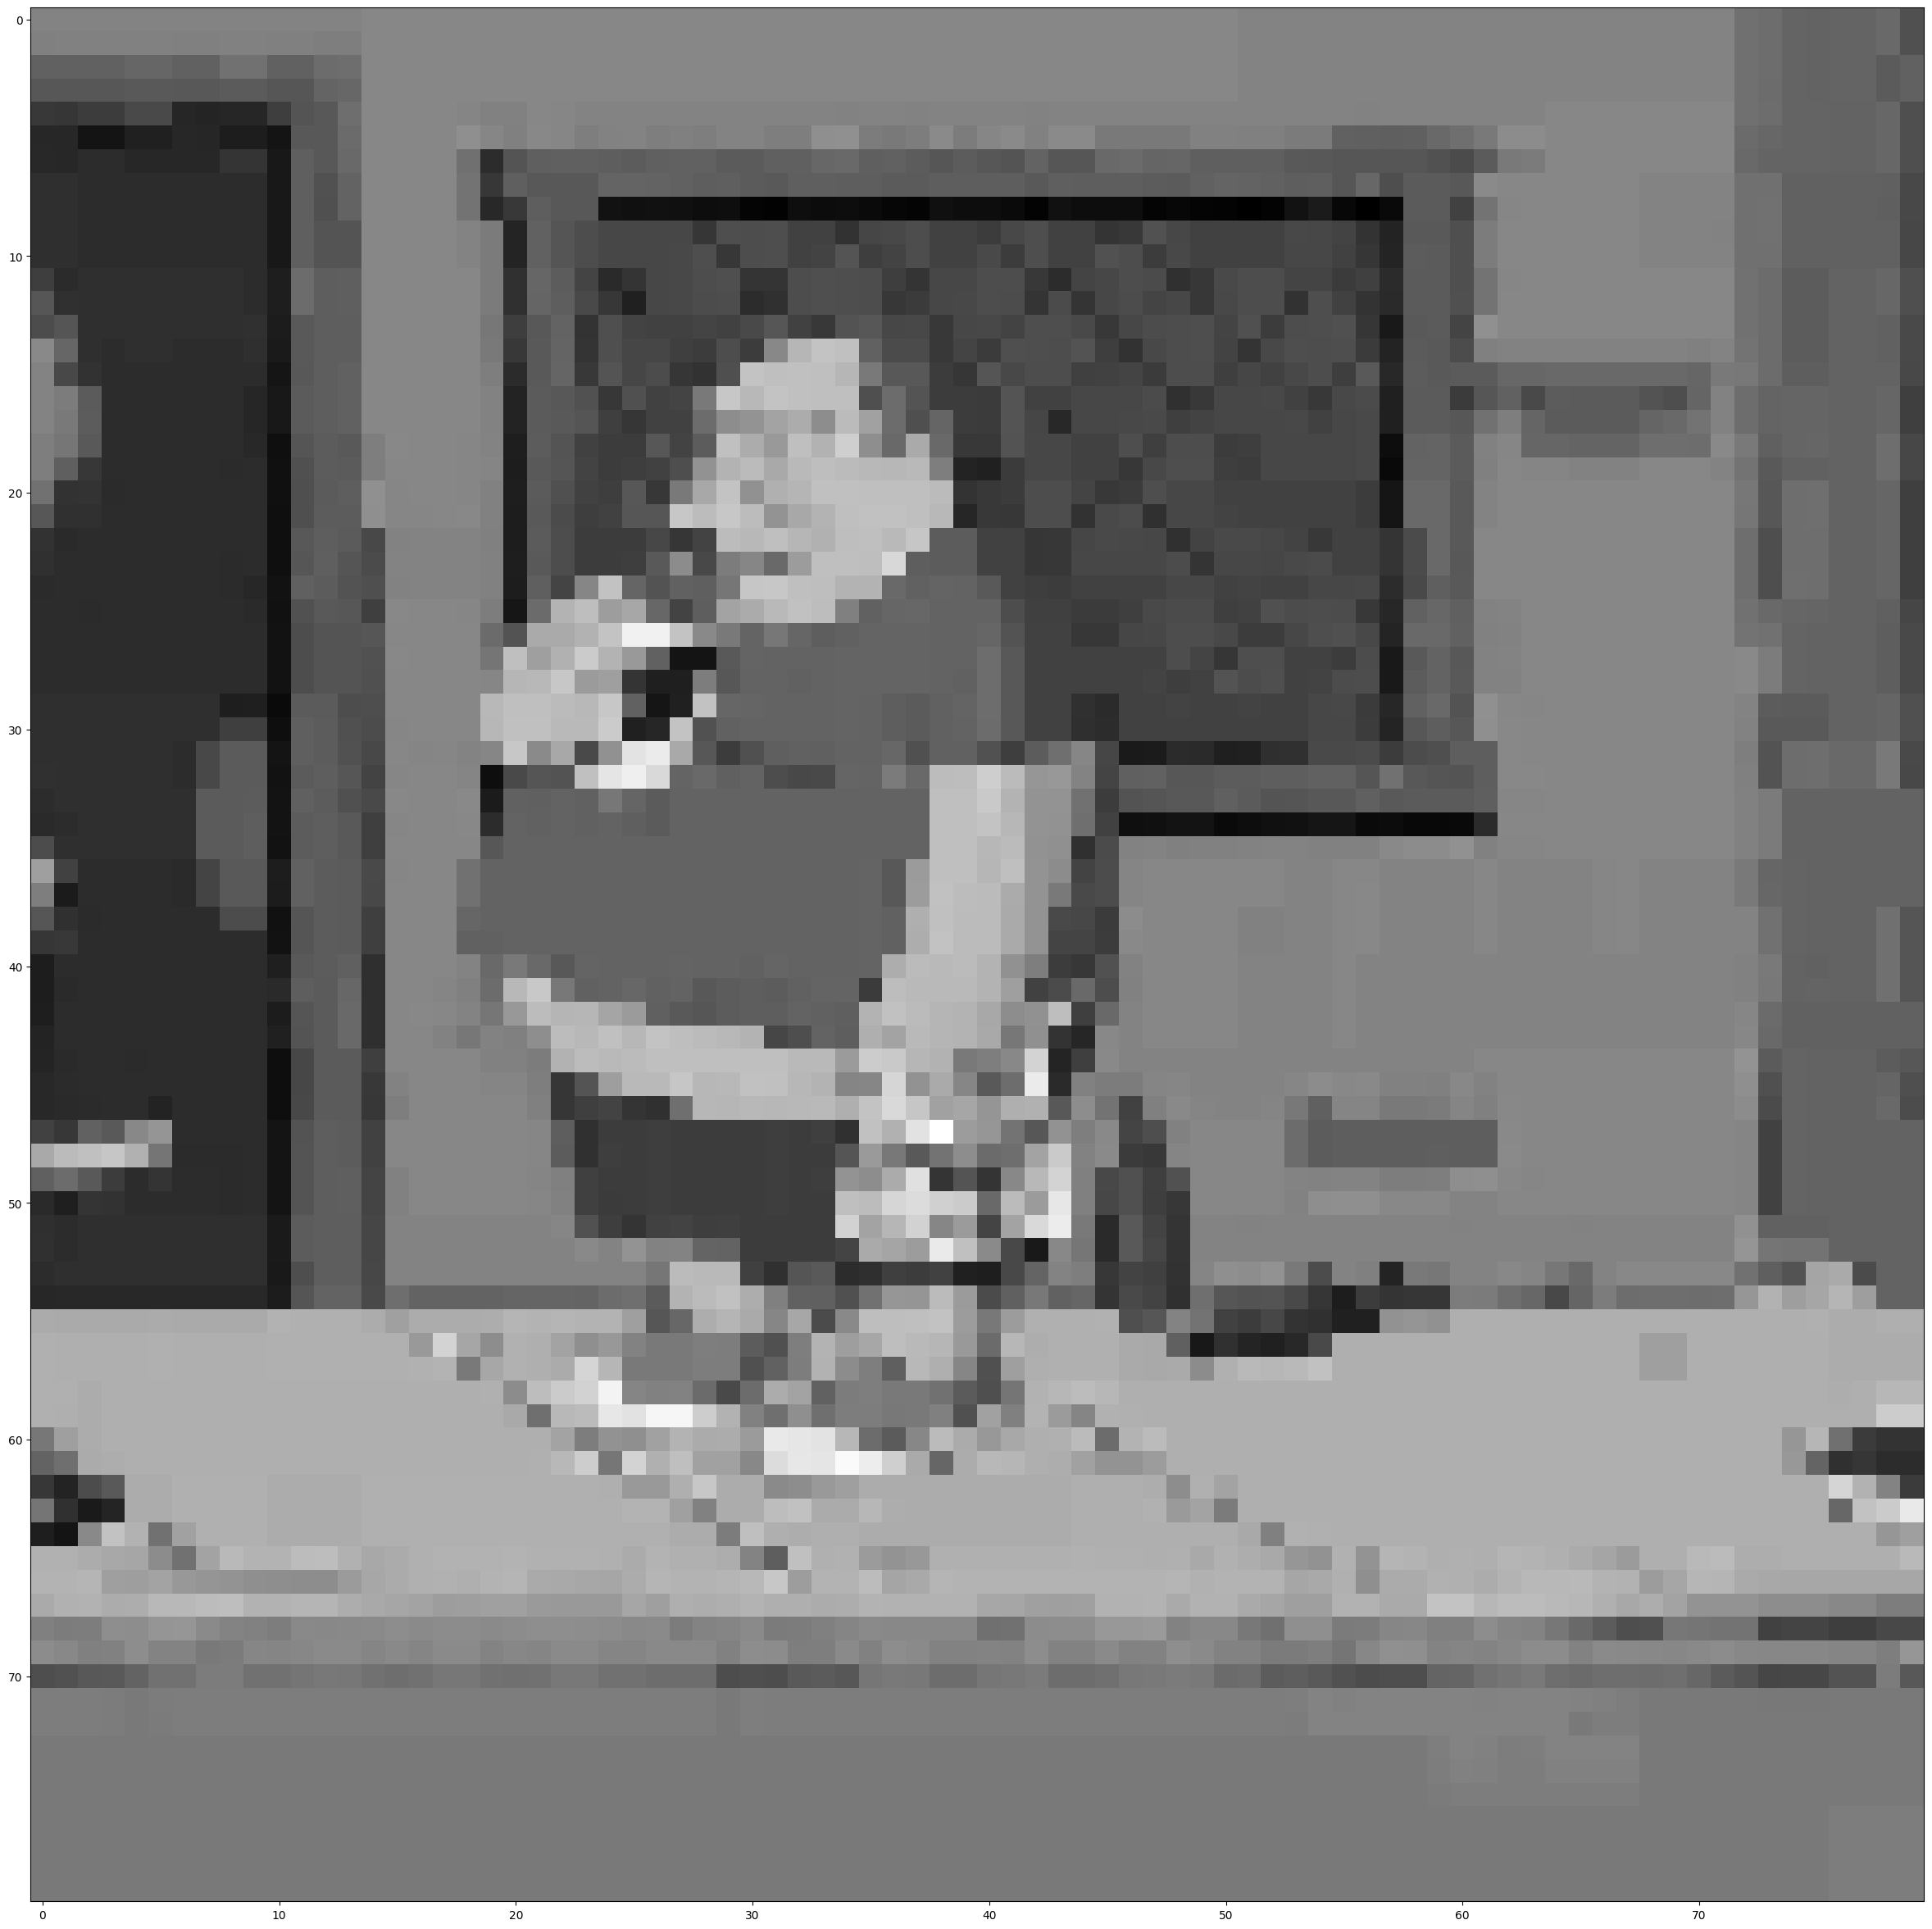

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,30))
plt.imshow(train[0][0], cmap = 'gray')
plt.show()

In [14]:
#separate training set into features and labels
featureSet , labels = caer.sep_train(train ,  IMG_SIZE = img_size) #reshapefeature set into 4D tensor so data can be fed into model with no restriction

In [15]:
!pip3 install tensorflow

In [16]:
from tensorflow.keras.utils import to_categorical
#normalise the featureSet
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels , len(characters))


In [17]:
x_train , x_val ,y_train  , y_val = caer.train_val_split(featureSet , labels  , val_ratio = 0.2 )


In [18]:
del train #removing variable we're not gonna be using to save memory
del featureSet
del labels
gc.collect()

0

In [19]:
#image data generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train , y_train , batch_size = batch_size )
print(len(train_gen))

121


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output to feed into dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))  # Using sigmoid for binary classification
learning_rate = 0.1
momentum = 0.9
nesterov = True
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0

In [22]:
EPOCHS = 50
training = model.fit(train_gen , steps_per_epoch = len(x_train)//batch_size , epochs = EPOCHS , validation_data= (x_val , y_val ) , validation_steps= len(y_val)//batch_size )

Epoch 1/50
121/121 [==============================] - 9s 37ms/step - loss: 0.3385 - accuracy: 0.1229 - val_loss: 0.3260 - val_accuracy: 0.1247
Epoch 2/50
121/121 [==============================] - 4s 31ms/step - loss: 0.3229 - accuracy: 0.1364 - val_loss: 0.3165 - val_accuracy: 0.1990
Epoch 3/50
121/121 [==============================] - 3s 28ms/step - loss: 0.3070 - accuracy: 0.2252 - val_loss: 0.3018 - val_accuracy: 0.2546
Epoch 4/50
121/121 [==============================] - 4s 35ms/step - loss: 0.2965 - accuracy: 0.2673 - val_loss: 0.2895 - val_accuracy: 0.3340
Epoch 5/50
121/121 [==============================] - 4s 30ms/step - loss: 0.2848 - accuracy: 0.3218 - val_loss: 0.2822 - val_accuracy: 0.3588
Epoch 6/50
121/121 [==============================] - 3s 28ms/step - loss: 0.2768 - accuracy: 0.3487 - val_loss: 0.2680 - val_accuracy: 0.3732
Epoch 7/50
121/121 [==============================] - 4s 36ms/step - loss: 0.2655 - accuracy: 0.3848 - val_loss: 0.2586 - val_accuracy: 0.4113

In [23]:
import cv2 as cv

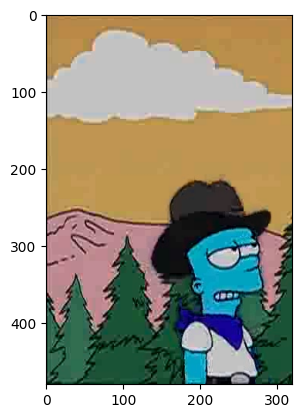

In [26]:
test_path = "/content/drive/MyDrive/ML/SimpsonsDataset/simpsons_dataset/bart_simpson/pic_0026.jpg"
img = cv.imread(test_path)
plt.imshow(img , cmap = 'gray')
plt.show()


In [27]:
def prepare(img):#to prepare our image in required dimensions for testing
  img = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
  img = cv.resize(img , img_size )
  img = caer.reshape(img, img_size , 1)
  return img


In [28]:
predictions = model.predict(prepare(img))


1/1 [==============================] - 0s 353ms/step


In [29]:
predictions


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
print(characters[np.argmax(predictions[0])])

krusty_the_clown
